# Preamble - load modules and setup environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
data = pd.read_csv('Salary_Data.csv')
x, y = data['YearsExperience'], data['Salary']

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Define functions

In [4]:
def lin_reg(x, y):
    """ Function to compute coefficients of linear regression model
    input - x: independent variable [columnar array]
          - y: dependent variable [columnar array]
    output - beta0: coefficient representing the y-intercept [float]
           - beta1: coefficient representing the gradient [float]
           - reg_line: [str]
    """
    N = len(x)
    xmean, ymean = x.mean(), y.mean()
    # beta expressions derived from calculus estimations
    beta1 = (((x - xmean)*(y - ymean)).sum()) / (((x - xmean)**2.).sum())
    beta0 = ymean - (beta1 * xmean)
    reg_line = r'y = {} + {}x'.format(beta0, beta1)
    return beta0, beta1, reg_line

def corr_coeff(x,y):
    """ Function computes the correlation efficient, R-squared
    input - x: independent variable [columnar array]
          - y: dependent variable [columnar array]
    output - R: coefficient of determination [float]
    """
    N = len(x)
    num = (N * (x * y).sum()) - (x.sum() * y.sum()) # define numerator
    den = np.sqrt((N * (x**2.).sum() - x.sum()**2.) * (N * (y**2.).sum() - y.sum()**2.)) # define denominator
    R = num/den # compute R
    return R

## Run regression model and evaluate goodness of solution

In [5]:
b0, b1, rline = lin_reg(x,y)
print('Regression line: ', rline)
R = corr_coeff(x,y)
print('Correlation coefficient: ', R)
print('Goodness of fit: ', R**2.)

Regression line:  y = 25792.20019866869 + 9449.962321455077x
Correlation coefficient:  0.97824161848876
Goodness of fit:  0.9569566641435087


## Visualise model

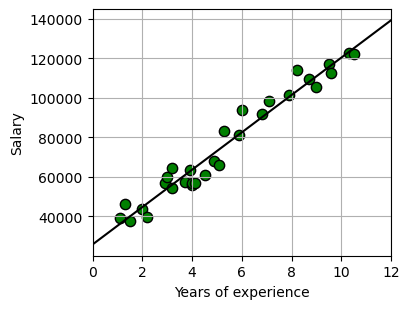

In [6]:
plt.figure(figsize=(4.2,3.2), dpi=100)
plt.grid()
plt.scatter(x,y, edgecolor='k', color='green', s=55)
xplot = np.linspace(0,12,10)
plt.plot(xplot, b0 + b1*xplot, 'k')
plt.xlim([0, 12]); 
plt.xlabel('Years of experience', fontsize=10)
plt.ylabel('Salary', fontsize=10)

plt.tight_layout()
plt.show()

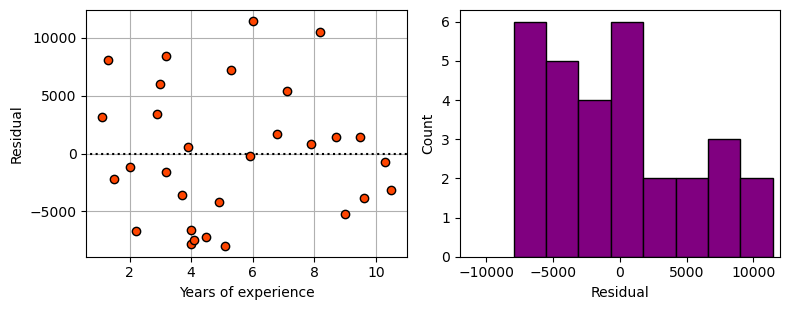

In [10]:
# inspect performance of model 
# compute residual for each observation
residual = []
for i in range(0,len(x)):
    residual.append(y[i]-(b0 + b1*x[i]))    


plt.figure(figsize=(8,3.2), dpi=100)
plt.subplot(1,2,1)
plt.plot([0,100],[0,0],'k:')
plt.plot(x, residual,'o', color='orangered', mec='k')
plt.xlim([min(x)-0.5, max(x)+0.5])
plt.xlabel('Years of experience', fontsize=10); plt.ylabel('Residual', fontsize=10)
plt.grid()

plt.subplot(1,2,2)
# Create histogram
N, bins, patches = plt.hist(residual, 8, edgecolor='k', color='purple') # choose 8 bins 
plt.xlabel('Residual', fontsize=10); plt.ylabel('Count', fontsize=10)
plt.xlim([-1.2e4, 1.2e4])
plt.tight_layout()
plt.show()

## model performance

In [8]:
# print worst performing residuals
print('max. residual is ${:.0f}'.format(max(residual)))
print('min. residual is ${:.0f}'.format(min(residual)))


tmpind = residual.index(min(residual))
minerr = residual[tmpind]/y[tmpind]*100

tmpind = residual.index(min(residual))
maxerr = residual[tmpind]/y[tmpind]*100

if round(minerr) == round(maxerr):
    print('all predictions within {}% of true value'.format(round(abs(minerr))))
else:
    print('worst underprediction is within {}% of true value'.format(round(abs(minerr))))
    print('worst overprediction within {}% of true value'.format(round(abs(maxerr))))

max. residual is $11448
min. residual is $-7958
all predictions within 12% of true value
